<a href="https://colab.research.google.com/github/PrateekBatham2004/IBM-Edunet-Internship/blob/main/employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install gdown to download from Google Drive
!pip install -U gdown

import pandas as pd
import gdown

# Use gdown to download the file using the file ID
file_id = "1DRZ6EWdNY9ldd3Qe5dtlC-lOQJrVpzzf"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "adult.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1DRZ6EWdNY9ldd3Qe5dtlC-lOQJrVpzzf
To: /content/adult.csv
100%|██████████| 5.33M/5.33M [00:00<00:00, 43.9MB/s]


'adult.csv'

In [ ]:
data = pd.read_csv("adult.csv")
data.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
data.tail(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
data.shape

(48842, 15)

In [ ]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-11-4184710730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [ ]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-13-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [ ]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [ ]:
print(data.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [ ]:
print(data.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


In [ ]:
data.shape

(48811, 15)

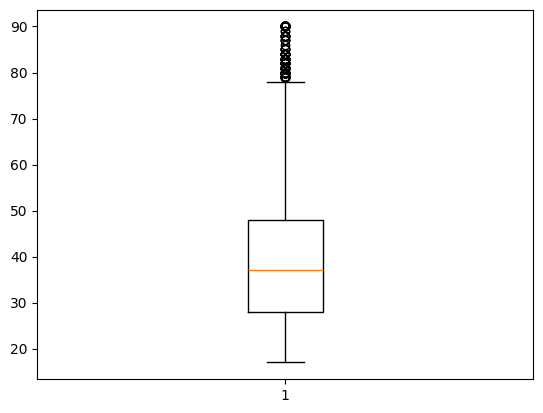

In [ ]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [ ]:
data=data[(data['age']<=75)&(data['age']>=17)]

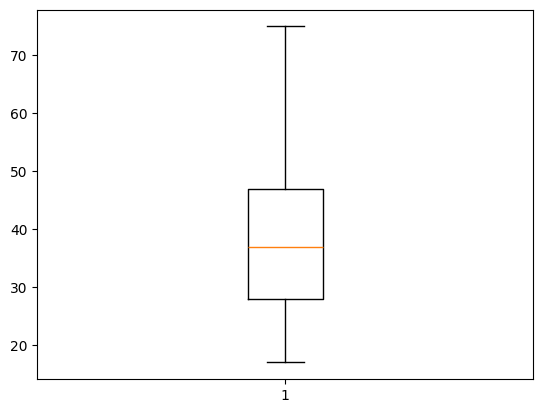

In [ ]:
plt.boxplot(data['age'])
plt.show()

In [ ]:
data.shape

(48438, 15)

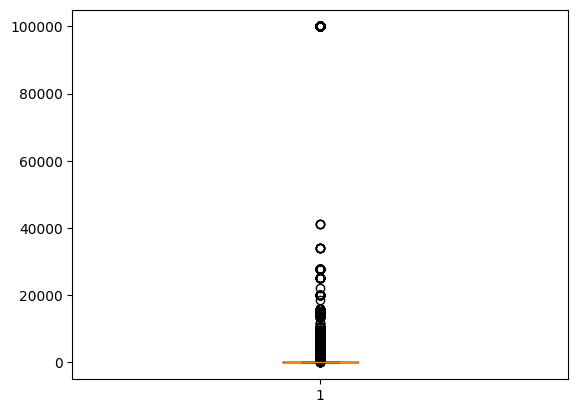

In [ ]:
plt.boxplot(data['capital-gain'])
plt.show()

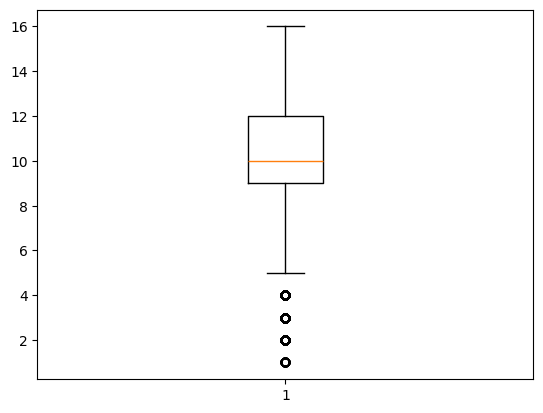

In [ ]:
plt.boxplot(data['educational-num'])
plt.show()

In [ ]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

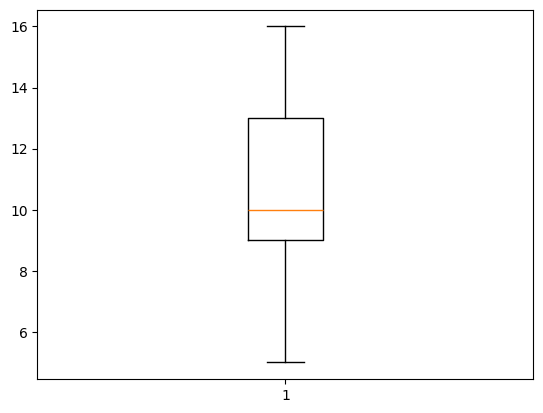

In [ ]:
plt.boxplot(data['educational-num'])
plt.show()

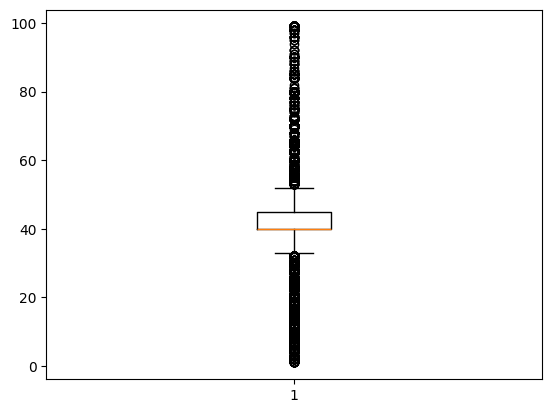

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [ ]:
data.shape

(46720, 15)

In [ ]:
data=data.drop(columns=['education']) #redundant features removal

In [ ]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [ ]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [ ]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8149
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7010
        >50K       0.69      0.46      0.55      2334

    accuracy                           0.81      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.80      0.81      0.80      9344

RandomForest Accuracy: 0.8501
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.74      0.61      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.84      0.85      0.85      9344

KNN Accuracy: 0.8245
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7010
        >50K       0.67      0.60      0.63      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.75      0.

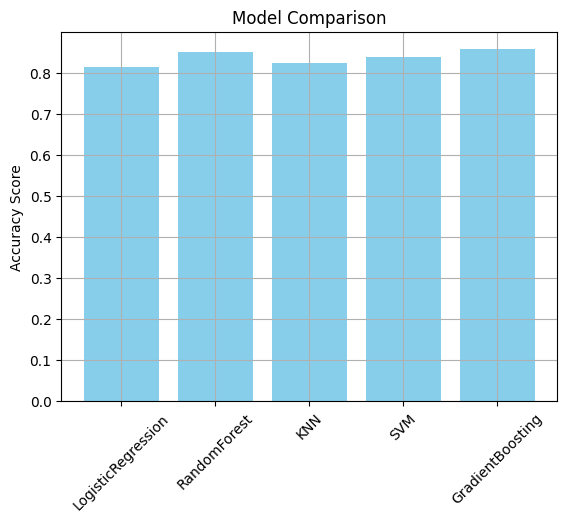

In [ ]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [36]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Your full dataset
# df = pd.read_csv(...)  # Already done earlier
X = data.drop("income", axis=1)
y = data["income"]

# Define column types
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}
best_pipe = None
best_score = 0
best_model_name = ""
# Training all models using pipeline
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    if acc > best_score:
        best_score = acc
        best_pipe = pipe
        best_model_name = name

LogisticRegression Accuracy: 0.8432
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      7010
        >50K       0.72      0.60      0.66      2334

    accuracy                           0.84      9344
   macro avg       0.80      0.76      0.78      9344
weighted avg       0.84      0.84      0.84      9344

RandomForest Accuracy: 0.8469
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7010
        >50K       0.73      0.61      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.80      0.77      0.78      9344
weighted avg       0.84      0.85      0.84      9344

KNN Accuracy: 0.8267
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7010
        >50K       0.67      0.60      0.63      2334

    accuracy                           0.83      9344
   macro avg       0.77      0.75      0.

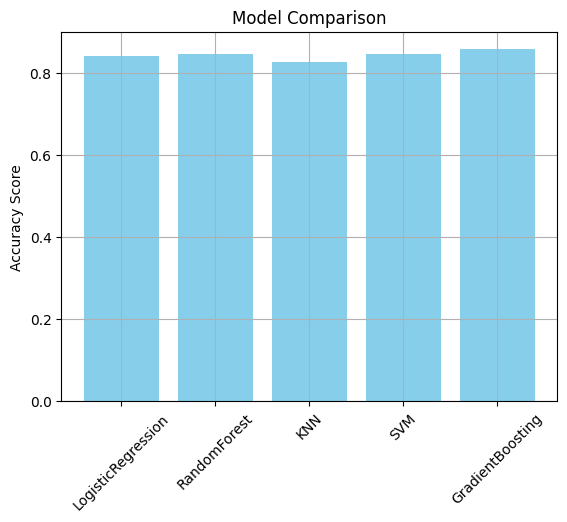

In [37]:

# Plot accuracy comparison
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [38]:
# Save the best pipeline
joblib.dump(best_pipe, 'best_model.pkl')
print(f"\n✅ Best model: {best_model_name} with accuracy: {best_score:.4f}")
print("✅ Model saved as best_model.pkl")


✅ Best model: GradientBoosting with accuracy: 0.8581
✅ Model saved as best_model.pkl


In [39]:
!pip install --quiet streamlit pyngrok joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [40]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Income Classifier", page_icon="💼", layout="centered")
st.title("💼 Income Prediction App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on features.")

st.sidebar.header("Enter Employee Details")

# Collect user input matching training features
age = st.sidebar.slider("Age", 18, 90, 30)
workclass = st.sidebar.selectbox("Workclass", [
    "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov",
    "State-gov", "Without-pay", "Never-worked"
])
fnlwgt = st.sidebar.number_input("Fnlwgt", value=200000)
educational_num = st.sidebar.slider("Educational-Num", 1, 16, 10)
marital_status = st.sidebar.selectbox("Marital Status", [
    "Married-civ-spouse", "Divorced", "Never-married", "Separated",
    "Widowed", "Married-spouse-absent", "Married-AF-spouse"
])
occupation = st.sidebar.selectbox("Occupation", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners",
    "Machine-op-inspct", "Adm-clerical", "Farming-fishing",
    "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"
])
relationship = st.sidebar.selectbox("Relationship", [
    "Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"
])
race = st.sidebar.selectbox("Race", [
    "White", "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"
])
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
capital_gain = st.sidebar.number_input("Capital Gain", value=0)
capital_loss = st.sidebar.number_input("Capital Loss", value=0)
hours_per_week = st.sidebar.slider("Hours per week", 1, 99, 40)
native_country = st.sidebar.selectbox("Native Country", [
    "United-States", "India", "Mexico", "Philippines", "Germany", "Canada",
    "China", "England", "Cuba", "South", "Jamaica", "Italy", "Japan", "Iran",
    "Others"
])

# Create input DataFrame
input_df = pd.DataFrame({
    'age': [age],
    'workclass': [workclass],
    'fnlwgt': [fnlwgt],
    'educational-num': [educational_num],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'hours-per-week': [hours_per_week],
    'native-country': [native_country]
})

st.write("### 🔍 Input Data")
st.dataframe(input_df)

# Prediction
if st.button("Predict Income Class"):
    prediction = model.predict(input_df)[0]
    st.success(f"✅ Predicted Income: {prediction}")

# Batch Prediction
st.markdown("---")
st.markdown("### 📂 Batch CSV Prediction")
uploaded_file = st.file_uploader("Upload a CSV file", type="csv")
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    preds = model.predict(df)
    df['Predicted Income'] = preds
    st.dataframe(df.head())
    csv = df.to_csv(index=False).encode('utf-8')
    st.download_button("Download CSV with Predictions", csv, "predicted_income.csv", "text/csv")


Overwriting app.py


In [41]:
from pyngrok import ngrok
import time
import subprocess

# Clean old tunnels
ngrok.kill()

# Set your ngrok authtoken (rotate if exposed)
NGROK_TOKEN = "30GVdTB3mEAaNMJftk1vVBTEsHP_5qMrsxf8SCy791MTaropv"
ngrok.set_auth_token(NGROK_TOKEN)

# Start Streamlit (background)
process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])

# Give Streamlit a moment to start
time.sleep(3)

# Open tunnel
public_url = ngrok.connect("http://localhost:8501")
print("Streamlit app is live at:", public_url.public_url)


Streamlit app is live at: https://216f2b72ded4.ngrok-free.app
